In [1]:
#import tensorflow 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
#!pip install seaborn
import seaborn as sns

In [78]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
 
# Load the MNIST data
df = pd.read_csv("training.csv")
df.head()

,Order parameter,KS,Lya_max,Shibata,delta
0,0.97,0.021836,2.802597e-45,-0.122693,0.0
1,0.97,0.021868,4.818850e-04,-0.114343,0.0
2,0.97,0.021837,-3.125273e-03,-0.135592,0.0
3,0.97,0.021928,-4.281330e-03,-0.144225,0.0
4,0.97,0.021839,-4.273063e-03,-0.145772,0.0


In [79]:
df['Shibata']=df['Shibata'].replace([ '-Infinity'], -10)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
len(df)

y = []
for i in range(len(df)):
    if (i <=502):
        y.append("periodic")
    if( 503<= i <= 1004):
        y.append("periodic2")
    if( 1004<=i<=1505):
        y.append("Frozen")
    if( 1505<=i<=2005):
        y.append("Selection")
    if( 2006<=i<=2506):
        y.append("Defect")
    if( 2507<=i<=3007):
        y.append("Intermittence")
    if( 3008<=i<=3508):
        y.append("Chaos")
        

In [81]:
df['Pattern']=pd.DataFrame(y)
y1 = df['Pattern']
df.head()

,Order parameter,KS,Lya_max,Shibata,delta,Pattern
0,0.97,0.021836,2.802597e-45,-0.122693,0.0,periodic
1,0.97,0.021868,4.818850e-04,-0.114343,0.0,periodic
2,0.97,0.021837,-3.125273e-03,-0.135592,0.0,periodic
3,0.97,0.021928,-4.281330e-03,-0.144225,0.0,periodic
4,0.97,0.021839,-4.273063e-03,-0.145772,0.0,periodic


In [82]:
d = {'periodic':0,'periodic2':1,'Frozen':2,'Selection':3,'Defect':4,'Intermittence':5,'Chaos':6}
df['Pattern'] = df['Pattern'].map(d)
df.head()

,Order parameter,KS,Lya_max,Shibata,delta,Pattern
0,0.97,0.021836,2.802597e-45,-0.122693,0.0,0
1,0.97,0.021868,4.818850e-04,-0.114343,0.0,0
2,0.97,0.021837,-3.125273e-03,-0.135592,0.0,0
3,0.97,0.021928,-4.281330e-03,-0.144225,0.0,0
4,0.97,0.021839,-4.273063e-03,-0.145772,0.0,0


In [83]:
df['Shibata'] = df['Shibata'].astype('float64') 

In [84]:
df.isnull().sum()

Order parameter      0
KS                   0
Lya_max              0
Shibata            276
delta                0
Pattern              0
dtype: int64

In [85]:
df.fillna(value = 0,  
          inplace = True)
df.isnull().sum()

Order parameter    0
KS                 0
Lya_max            0
Shibata            0
delta              0
Pattern            0
dtype: int64

In [86]:
y = df['Pattern'].values
print(y)
X = df.iloc[:,0:5].values
X = np.array(X)
print(X.shape)

[0 0 0 ... 6 6 6]
(3507, 5)


In [87]:
print(X.shape)
print(y.shape)

(3507, 5)
(3507,)


In [53]:
RS=20150101
nDim=2
tSNE = TSNE( n_components=nDim, random_state=RS ).fit_transform(X)

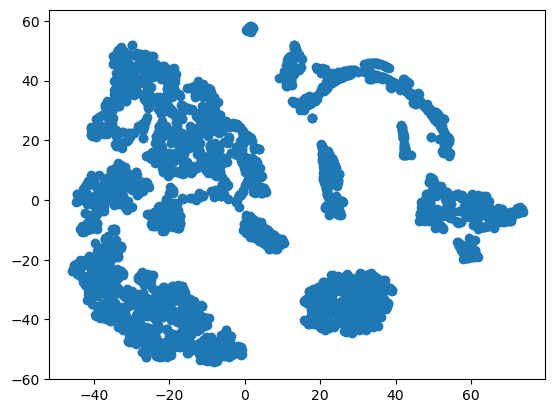

In [55]:
plt.scatter(tSNE[:,0],tSNE[:,1])

## k-Mean

In [73]:
kmeans_kwargs = {'init':'random', 'n_init':10, 'max_iter':2000, \
                    'random_state': RS }

In [74]:
kmeans = KMeans( n_clusters=6, **kmeans_kwargs )
kmeans.fit( tSNE )
LABELs = kmeans.labels_
centroides = kmeans.cluster_centers_

In [15]:
LABELs.shape

(3507,)

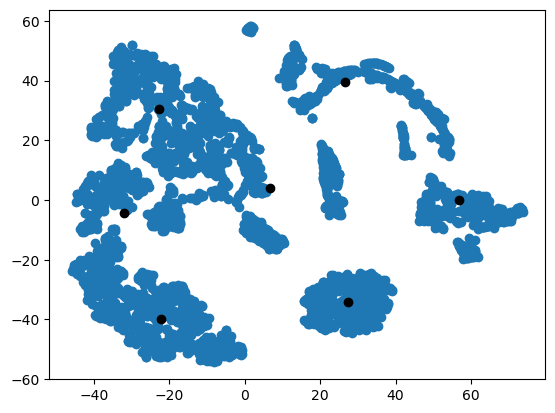

In [16]:
plt.scatter(tSNE[:,0],tSNE[:,1])
plt.scatter(centroides[:,0],centroides[:,1],color='black')

In [17]:
LABELs = LABELs.reshape(-1,1)
x = np.hstack([tSNE,LABELs])
print(x.shape)
x[0]

(3507, 3)


array([ 0.51823258, 57.2847023 ,  1.        ])

In [18]:
cmap = np.array(["red","orange","blue","black","yellow","brown","pink"])

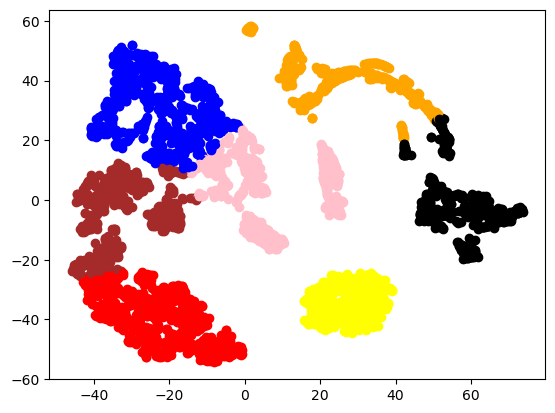

In [19]:
for i in range(3507):
    k = int(x[i][2])
    plt.scatter(x[i][0],x[i][1],color = cmap[k])
   # plt.scatter(centroides[:,0],centroides[:,1],s=100)
#plt.legend()

In [89]:
tsne_result_df = pd.DataFrame({'tsne_1': tSNE[:,0], 'tsne_2': tSNE[:,1], 'label': y1})

In [88]:

y1

0       periodic
1       periodic
2       periodic
3       periodic
4       periodic
          ...   
3502       Chaos
3503       Chaos
3504       Chaos
3505       Chaos
3506       Chaos
Name: Pattern, Length: 3507, dtype: object

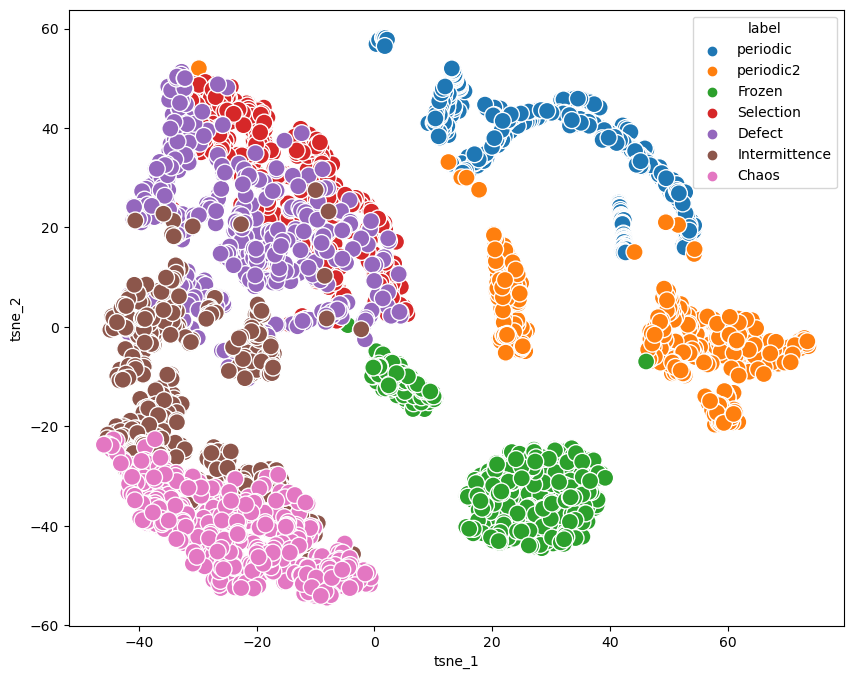

In [93]:
#t =  tSNE[:,0]
fig = plt.figure(figsize=(10,8))
#fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2',hue='label',data=tsne_result_df,s=150)
lim = (tSNE.min()-5, tSNE.max()+5)
#plt.scatter(centroides[:,0],centroides[:,1],s=100)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=10, borderaxespad=0.0,fontsize=50)

## Class definition

### 0 => periodic

### 1 => periodic2

### 2 => Frozen

### 3  => Selection

### 4 => Defect

### 5 => Intermittence

### 6 => chaos
